# Lab 05 - Power Spectral Density, Noise, and Symbol Timing Information

### Maurice Woods

### 7 March 2017


------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 01 - showpsd Python Function

In [1]:
from pylab import *
import ecen4652 as ecen
import showfun
import quick
import pamfun
import ptfun

##### Part A.) - Add the showpsd function to the showfun module

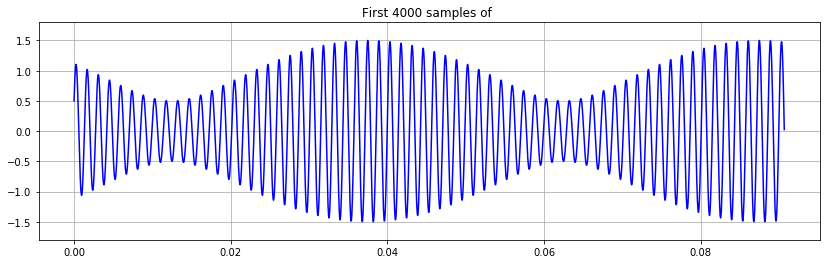

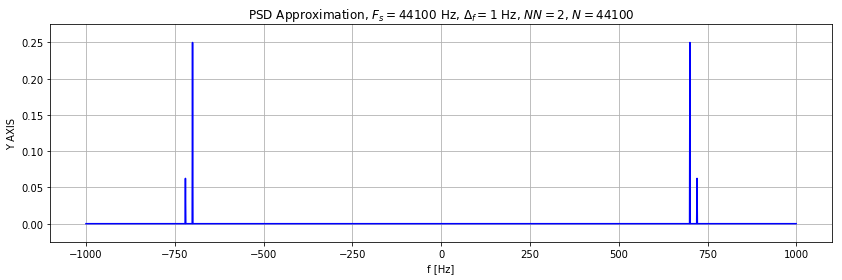

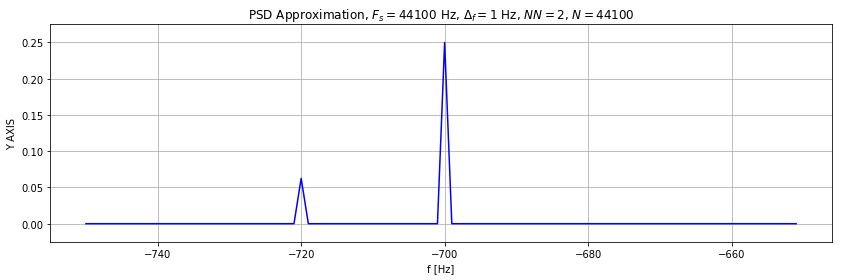

In [2]:
Fs = 44100 # Sampling rate
f1 = 700 # Test frequency 1
f2 = 720 # Test frequency 1
tlen = 2 # Duration in seconds
tt = arange(round(tlen*Fs))/float(Fs) # Time axis

x1t = sin(2*pi*f1*tt) # Sine with freq f1
x2t = 0.5*cos(2*pi*f2*tt) # Attenuated cosine with freq f2
sig_xt = ecen.sigWave(x1t+x2t, Fs, 0) # Combined sinusoidal signal
xtt = quick.quicktt(sig_xt.sig,Fs)
quick.quickplot(xtt,sig_xt.sig,'-b',[],[],'','','','',['first',4000])

showfun.showpsd0(sig_xt,[-1000, 1000, 0],Fs) #Plot S_x(f)
showfun.showpsd0(sig_xt,[-750, -650, 0],Fs) #Plot S_x(f)

##### Part B.) - Add a feature to showpsd so that it displays the total power in the title of the plots

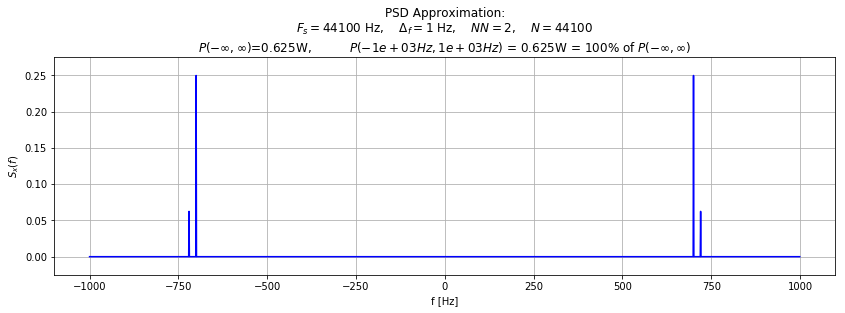

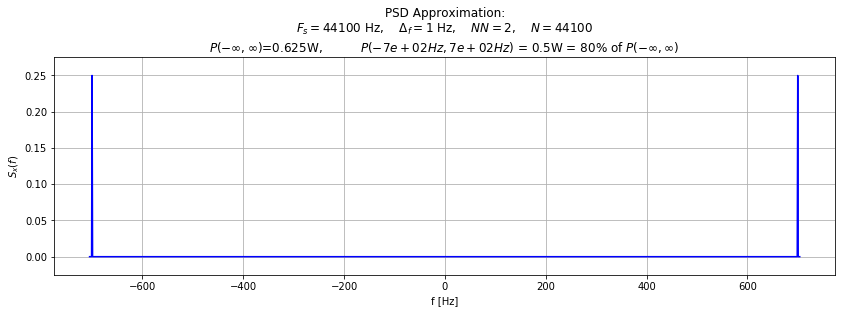

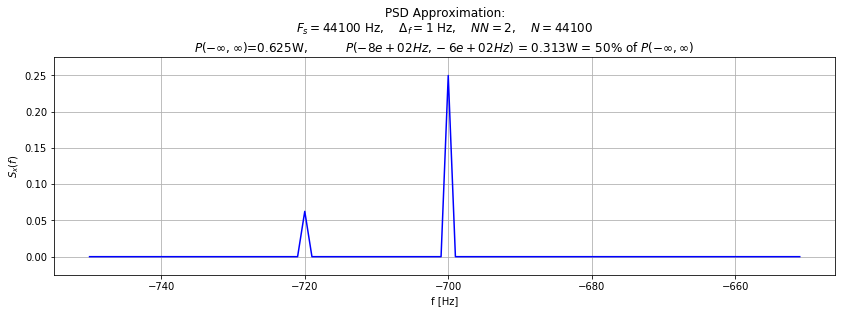

In [3]:
showfun.showpsd1(sig_xt,[-1000, 1000, 0],Fs) #Plot S_x(f)
showfun.showpsd1(sig_xt,[-705, 705, 0],Fs) #Plot S_x(f)
showfun.showpsd1(sig_xt,[-750, -650, 0],Fs) #Plot S_x(f)

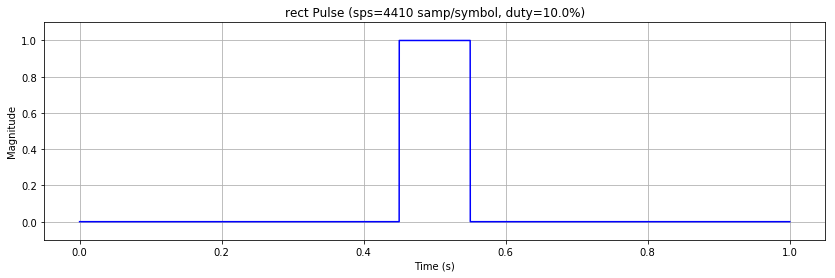

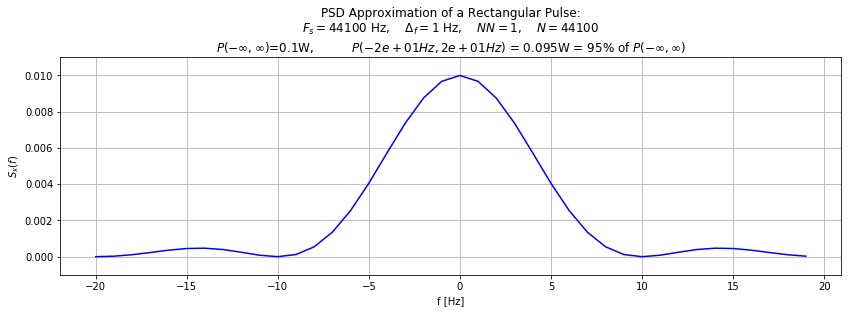

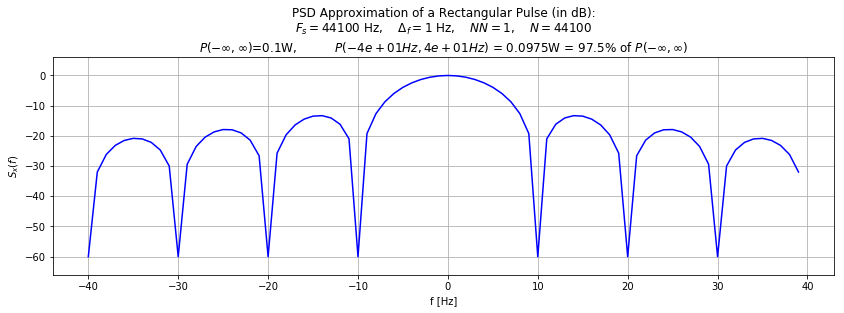

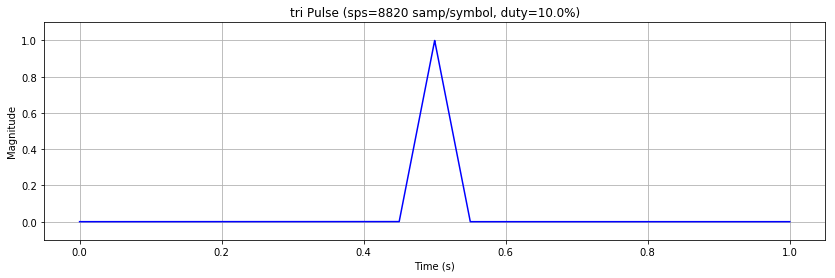

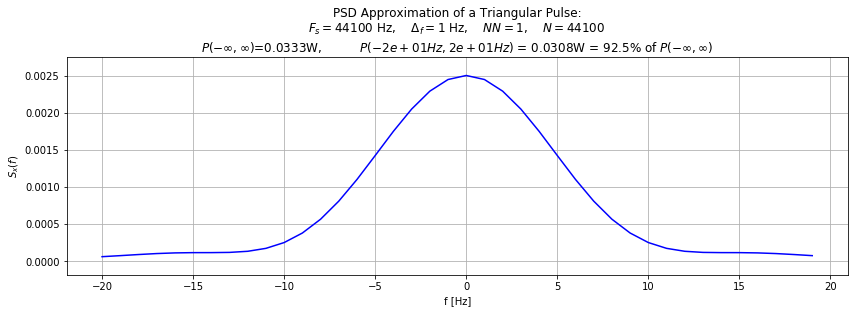

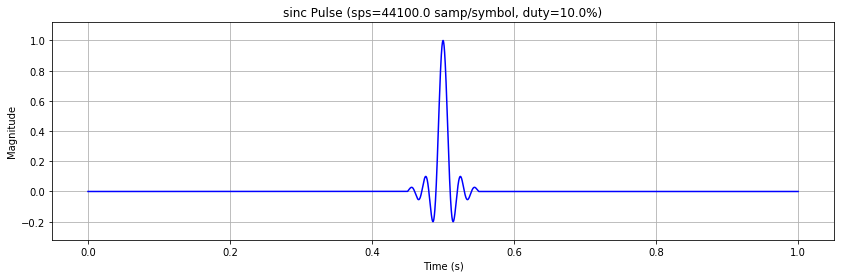

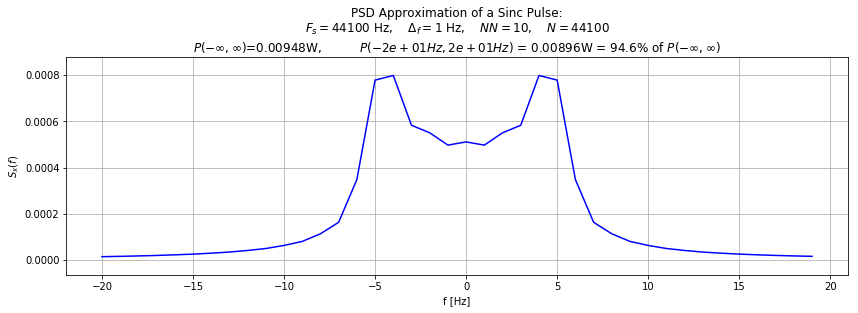

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab05/ptfun.py:46: RuntimeWarning: divide by zero encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))
/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab05/ptfun.py:46: RuntimeWarning: invalid value encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))


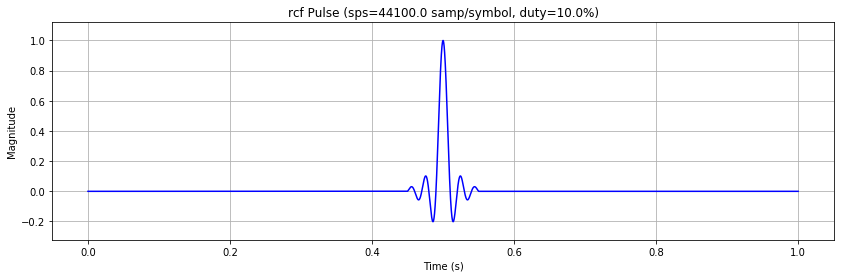

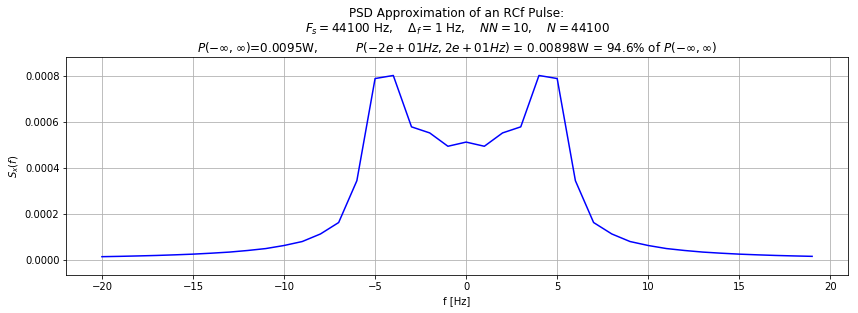

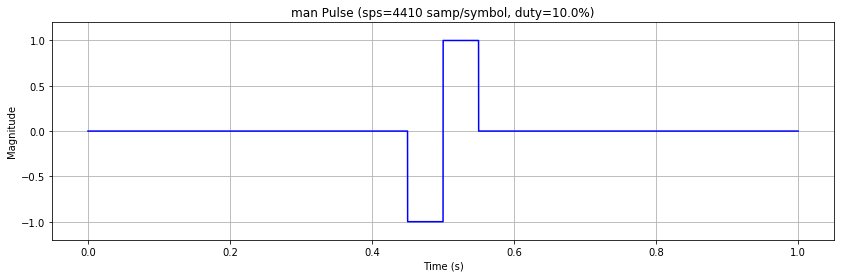

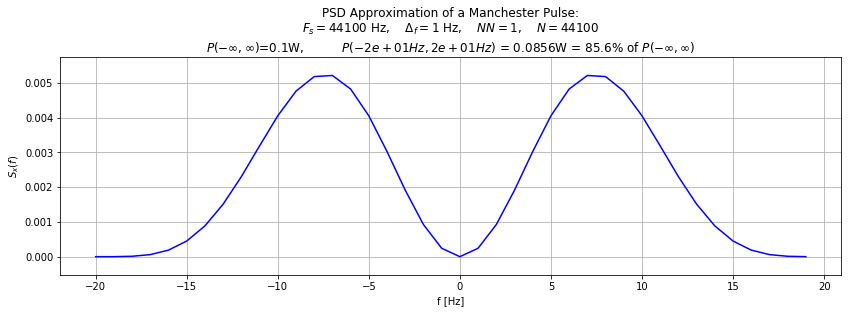

In [4]:
Fs = 44100
FB = 100
sps = int(Fs*0.1)
N = Fs

sig_xt = ptfun.pampt(sps,'rect',[],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, 0],N,'a Rectangular Pulse') #Plot S_x(f)
showfun.showpsd1(sig_xt,[-40, 40, -60],Fs,'a Rectangular Pulse (in dB)')   # Plot S_x(f)

sig_xt = ptfun.pampt(sps,'tri',[],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, 0],N,'a Triangular Pulse') #Plot S_x(f)

sig_xt = ptfun.pampt(sps,'sinc',[5,2.6],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, 0],N,'a Sinc Pulse') #Plot S_x(f)

sig_xt = ptfun.pampt(sps,'rcf',[5,0.2],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, 0],N,'an RCf Pulse') #Plot S_x(f)

sig_xt = ptfun.pampt(sps,'man',[],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, -0],N,'a Manchester Pulse') #Plot S_x(f)

##### Part C.) - Generate about 5 sec of random binary polar PAM signals with rectangular, triangular, and sinc pulses

Rectangular pulse created but not plotted...


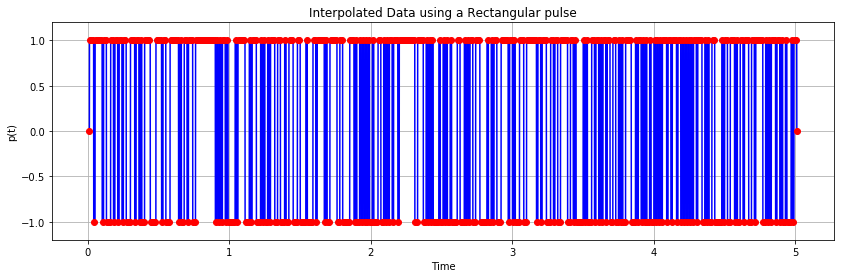

Tritangular pulse created but not plotted...


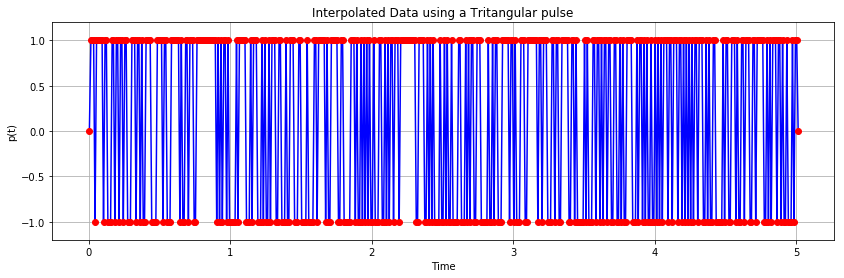

Sinc pulse created but not plotted...


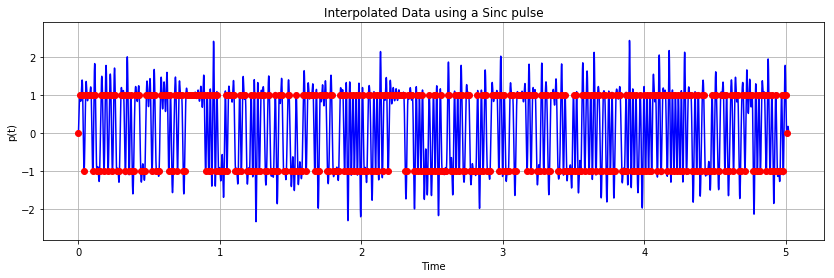

In [5]:
FB = 100 # bits per sec
t = 5 # seconds
N = t*FB # data points
dn = around(rand(N)) # random unipolar binary signal
an = ((dn*2)-1).astype(int) #polar binary
an = concatenate([[0],an,[0]])
sig_an = ecen.sigSequ(an,FB)

intrp_an_rect = pamfun.pam11(sig_an, Fs, 'rect',[],['nopulse'])
intrp_an_tri  = pamfun.pam11(sig_an, Fs, 'tri' ,[],['nopulse'])
intrp_an_sinc = pamfun.pam11(sig_an, Fs, 'sinc',[20,0],['nopulse'])

In [6]:
sig_intrp_an_rect = ecen.sigWave(intrp_an_rect.sig, Fs, 0) #
sig_intrp_an_tri  = ecen.sigWave(intrp_an_tri.sig,  Fs, 0) #
sig_intrp_an_sinc = ecen.sigWave(intrp_an_sinc.sig, Fs, 0) #

Determine how much of the total power is contained withing the bandwidths specified by the 'Rules of Thumb':

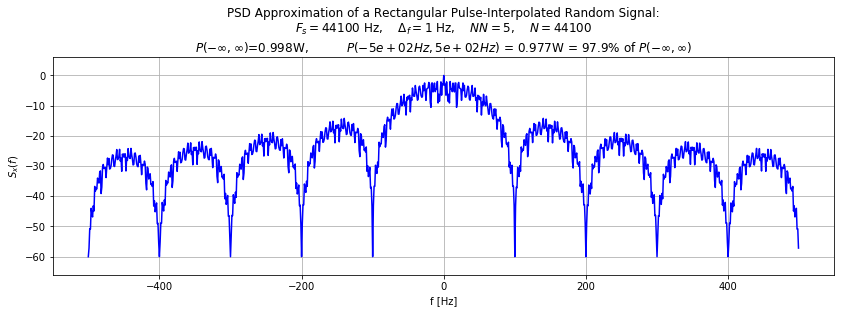

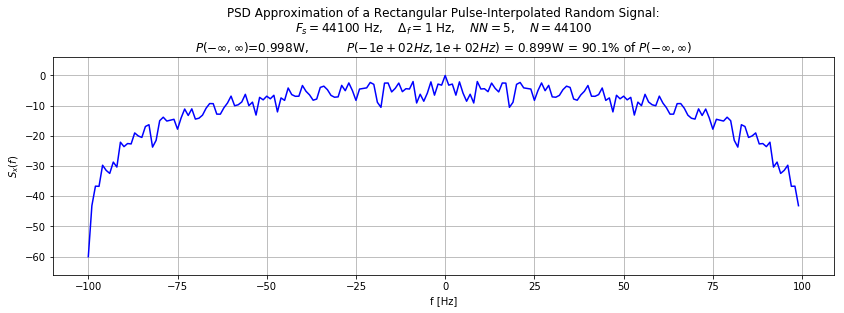

In [7]:
showfun.showpsd1(sig_intrp_an_rect,[-500, 500, -60],Fs,'a Rectangular Pulse-Interpolated Random Signal') #Plot S_x(f)
showfun.showpsd1(sig_intrp_an_rect,[-FB, FB, -60],Fs,'a Rectangular Pulse-Interpolated Random Signal') #Plot S_x(f)

> About 50% of the rectangular PAM's PSD is contained within the 2FB bandwidth

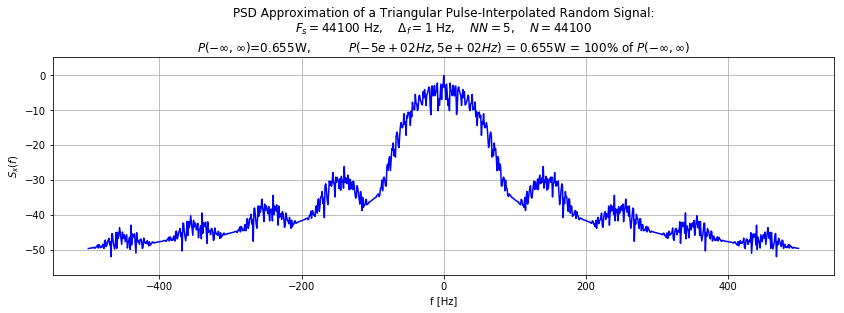

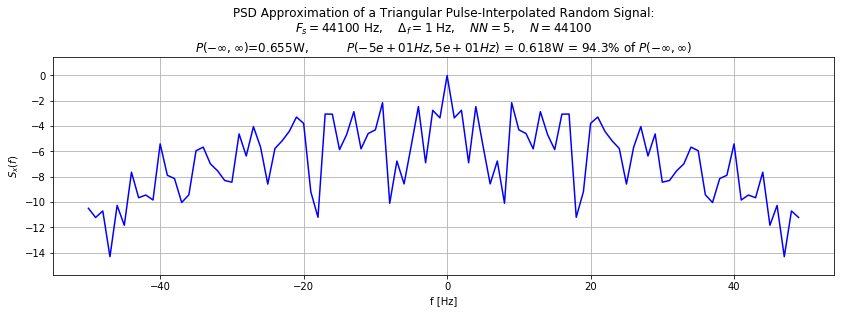

In [8]:
showfun.showpsd1(sig_intrp_an_tri,[-500, 500, -60],Fs,'a Triangular Pulse-Interpolated Random Signal') #Plot S_x(f)
showfun.showpsd1(sig_intrp_an_tri,[-FB/2, FB/2, -60],Fs,'a Triangular Pulse-Interpolated Random Signal') #Plot S_x(f)

> About 95% of the triangular PAM's PSD is contained within the FB bandwidth

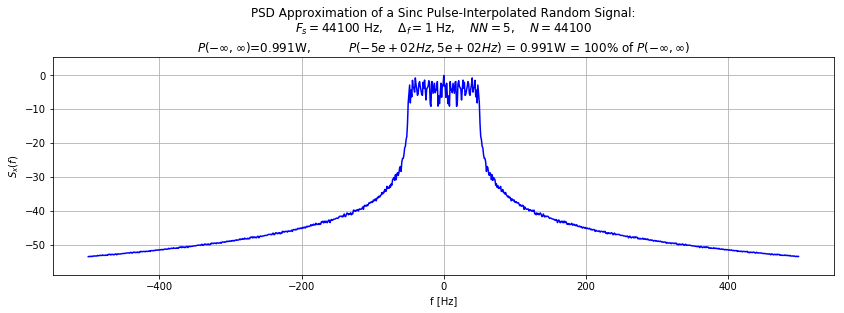

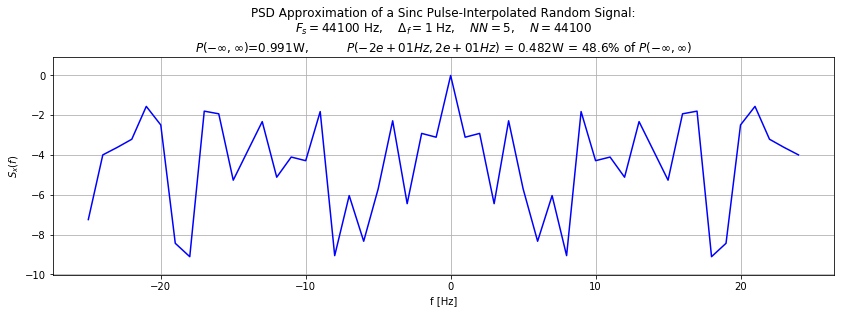

In [9]:
showfun.showpsd1(sig_intrp_an_sinc,[-500, 500, -60],Fs,'a Sinc Pulse-Interpolated Random Signal') #Plot S_x(f)
showfun.showpsd1(sig_intrp_an_sinc,[-FB/4, FB/4, -60],Fs,'a Sinc Pulse-Interpolated Random Signal') #Plot S_x(f)

> About 50% of the sinc PAM's PSD is contained within the FB/2 bandwidth

##### Part D.) - PSD and Measuring Power in GNU Radio

How much of the total signal power is contained in the bandwidths of the following PAM signals:

> Rectangular pulse:
>![1D.1](1_d_1.png)
> The percentage of the total power for a rectangular pulse (FB/2) (after being bandlimited by fL=64000) contained in the bandwidth is about 95%
> 
> Triangular pulse:
> ![1D.2](1_d_2.png)
> The percentage of the total power for a triangular pulse (FB) (after being bandlimited by fL=64000) contained in the bandwidth is about 94%
> 
> Sinc pulse:
> ![1D.3](1_d_3.png)
> The percentage of the total power for an sinc pulse (FB/2) (after being bandlimited by fL=64000) contained in the bandwidth is about 49%
> 
> Manchester pulse:
> ![1D.4](1_d_5.png)
> Assuming a the same "rule of thumb" bandwidth as a rectangular pulse (2FB) (after being bandlimited by fL=64000), the percentage of the total power for a manchester pulse contained in the bandwidth is about 53%
> 
> RCf pulse:
> ![1D.5](1_d_4.png)
> Assuming a the same "rule of thumb" bandwidth as a sinc pulse (FB/2) (after being bandlimited by fL=64000), the percentage of the total power for an RCf pulse contained in the bandwidth is about 75%

##### Part E.) - Power in Complex-Valued Waveforms

Question

> ![1E.1](1_e_1.png)
> Avg Power in the Real part of a Rectangular Pulse: ~1.00
> Imaginary power contribution: 0.501
> 
> ![1E.2](1_e_2.png)
> Avg Power in the Real part of a Triangular Pulse: ~0.95
> Imaginary power contribution: 0.47
> 
> ![1E.3](1_e_3.png)
> Avg Power in the Real part of a Sinc Pulse: ~0.66
> Imaginary power contribution: 0.33
>
> The imaginary contribution is always about half of the real power

------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 02 - Generating and Estimating Noise

##### Part A.) - Generate 5 sec of white Gaussian noise

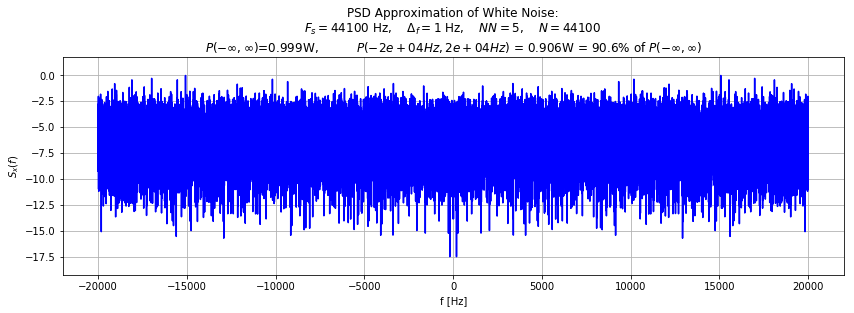

In [10]:
Fs = 44100 # Sampling
tlen = 5   # Duration
tt = arange(round(tlen*Fs))/float(Fs)
nt = randn(len(tt)) # Gaussian
sig_nt = ecen.sigWave(nt, Fs, tt[0])
#sig_nt = pamfun.pam11(sig_nt,Fs,'rcf',[20, 0.2]) #Bandlimited noise n(t), rate Fs
showfun.showpsd1(sig_nt,[-20000, 20000, -60],Fs,'White Noise') #Plot S_x(f)

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab05/pamfun.py:177: RuntimeWarning: invalid value encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))


RCf pulse created but not plotted...


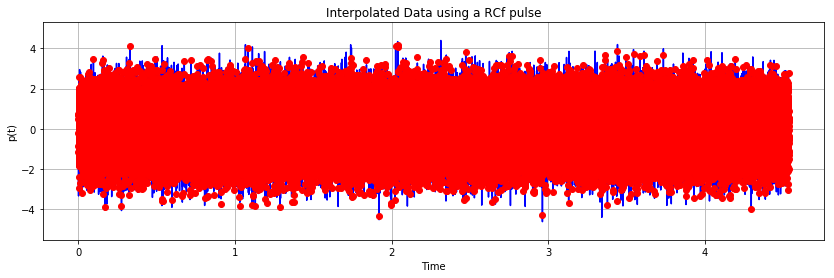

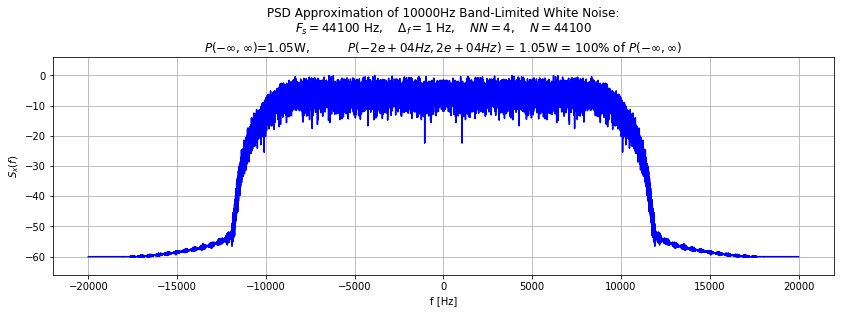

RCf pulse created but not plotted...


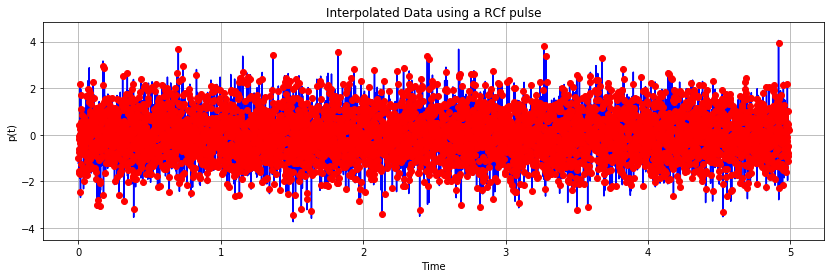

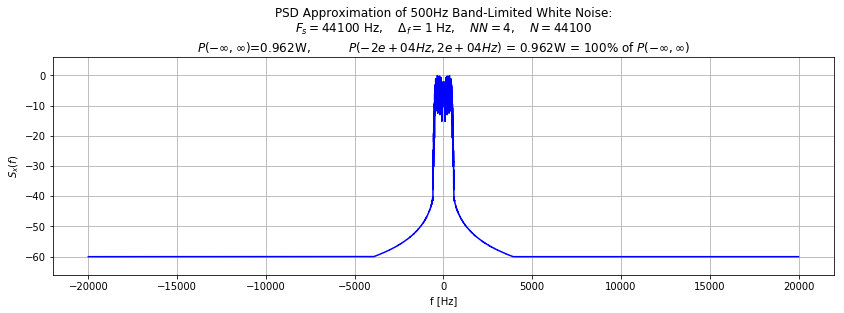

In [11]:
import ecen4652 as ecen
Fs = 44100 # Sampling rate
tlen = 5 # Duration in seconds

nfL = 10000 # Noise cutoff frequency
nn = randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
sig_nn = ecen.sigSequ(nn, 2*nfL, 0)
sig_nt = pamfun.pam11(sig_nn,Fs,'rcf',[20, 0.2],['nopulse']) #Bandlimited noise n(t), rate Fs
showfun.showpsd1(sig_nt,[-20000, 20000, -60],Fs,str(nfL)+'Hz Band-Limited White Noise') #Plot S_x(f)

nfL = 500 # Noise cutoff frequency
nn = randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
sig_nn = ecen.sigSequ(nn, 2*nfL, 0)
sig_nt = pamfun.pam11(sig_nn,Fs,'rcf',[20, 0.2],['nopulse']) #Bandlimited noise n(t), rate Fs
showfun.showpsd1(sig_nt,[-20000, 20000, -60],Fs,str(nfL)+'Hz Band-Limited White Noise') #Plot S_x(f)

#nfL = 10 # Noise cutoff frequency
#nn = randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
#sig_nn = ecen.sigSequ(nn, 2*nfL, 0)
#sig_nt = pamfun.pam11(sig_nn,Fs,'rcf',[20, 0.2],['nopulse']) #Bandlimited noise n(t), rate Fs
#showfun.showpsd1(sig_nt,[-20000, 20000, -60],Fs,str(nfL)+'Hz Band-Limited White Noise') #Plot S_x(f)

##### Part B.) - Generate a random polar binary PAM signal s(t) of length 2 sec with triangular p(t)

Tritangular pulse created but not plotted...
Supressing plotting result


/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab05/pamfun.py:177: RuntimeWarning: invalid value encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))


RCf pulse created but not plotted...
Supressing plotting result


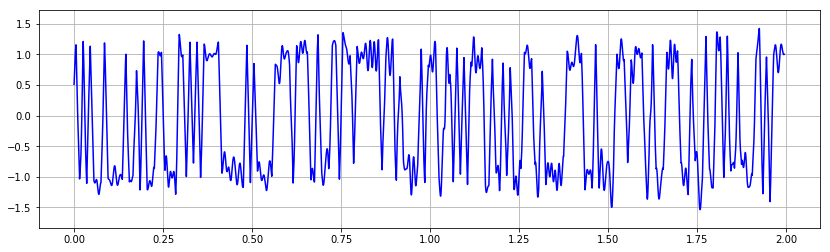

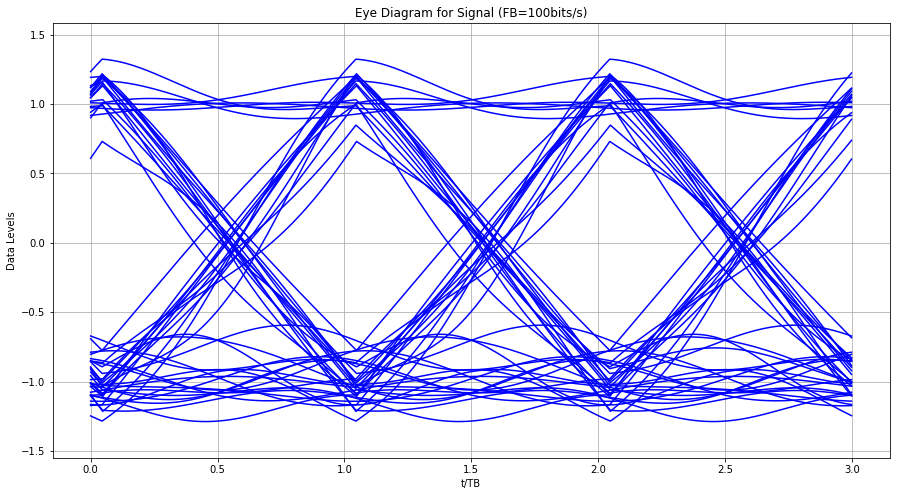

In [12]:
FB = 100
Fs = 44100
L = 2
st = pamfun.randompam(2,'tri')
nt = pamfun.whitenoise(2,FB)

A = 0.185
rt = st.sig[200:]+(A*nt.sig)
rt = ecen.sigWave(rt, Fs)

tt = quick.quicktt(rt.sig,Fs)
quick.quickplot(tt,rt.sig)

showfun.showeye(rt, FB, 50, [0.5, 3, -1.5*L, 1.5*L],'large')

At what Signal to Noise ration does the eye diagram close about 50%?

> 50% closure of the eye diagram happens at around A=0.185

##### Part C.) - PAM signal SNR estimation in GNU Radio

In [13]:
import wavfun
NTd=150
L=2
dly=0.5

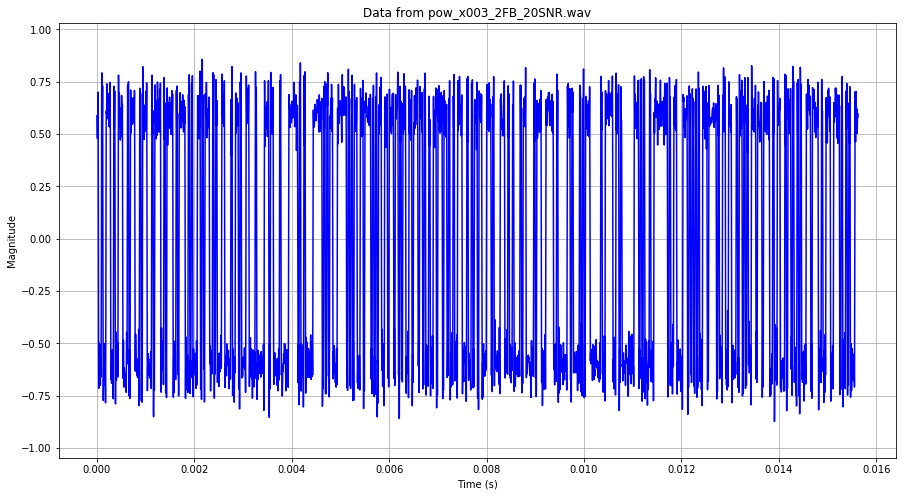

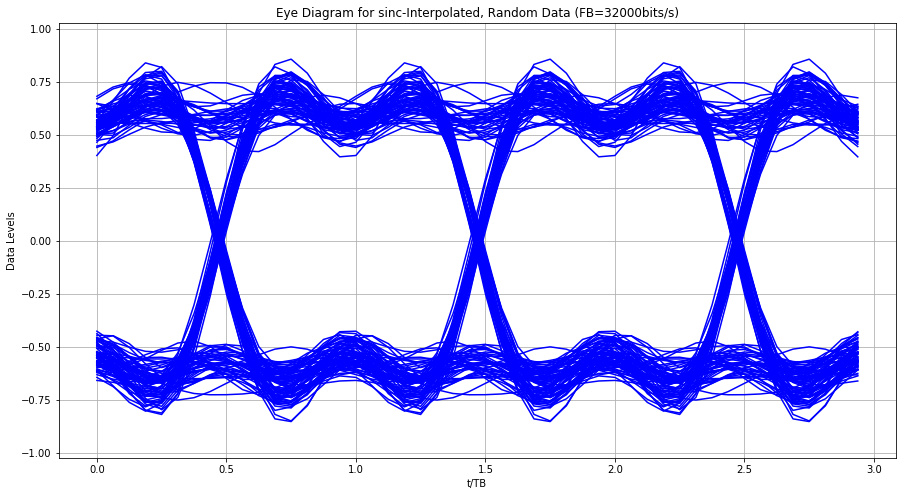

In [14]:
[seq, framerate] = wavfun.wavread("pow_x003_2FB_20SNR.wav")

seq=seq[2000:10000]
Fs=framerate

seqtt = quick.quicktt(seq,Fs)  # [0:10000]
quick.quickplot(seqtt,seq,'-b',[],[],'','Data from pow_x003_2FB_20SNR.wav','Time (s)','Magnitude',[],[15,8]) #['first',10000]

wave_an = ecen.sigWave(seq, Fs, 0, 'sinc-Interpolated, Random Data')
FB=32000

showfun.showeye(wave_an, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

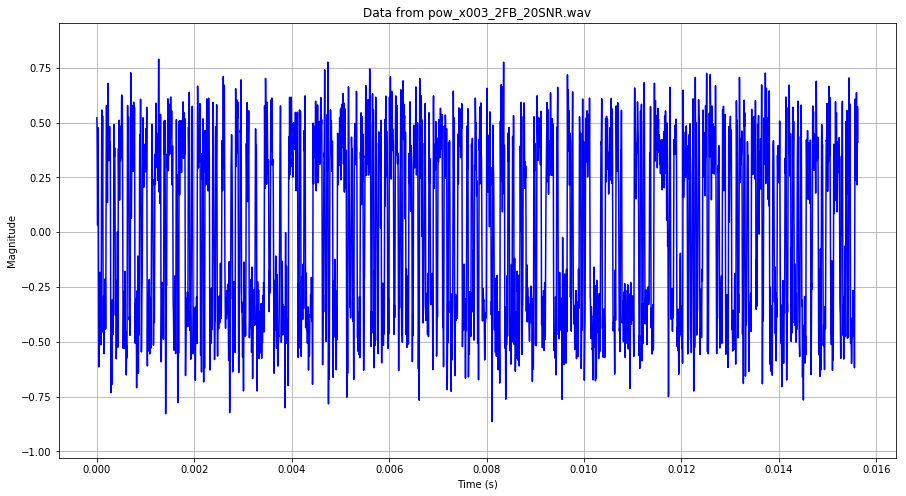

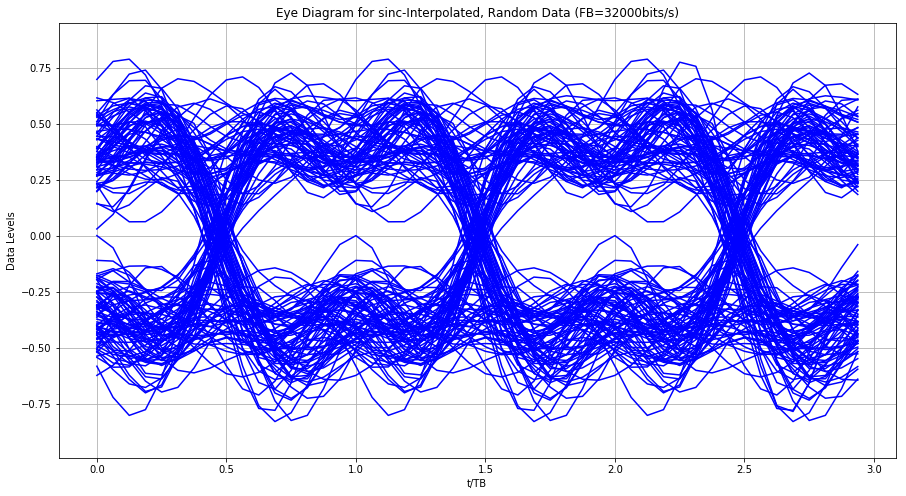

In [15]:
[seq, framerate] = wavfun.wavread("pow_x003_2FB_10SNR.wav")

seq=seq[2000:10000]
Fs=framerate

seqtt = quick.quicktt(seq,Fs)  # [0:10000]
quick.quickplot(seqtt,seq,'-b',[],[],'','Data from pow_x003_2FB_20SNR.wav','Time (s)','Magnitude',[],[15,8]) #['first',10000]

wave_an = ecen.sigWave(seq, Fs, 0, 'sinc-Interpolated, Random Data')
FB=32000

showfun.showeye(wave_an, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

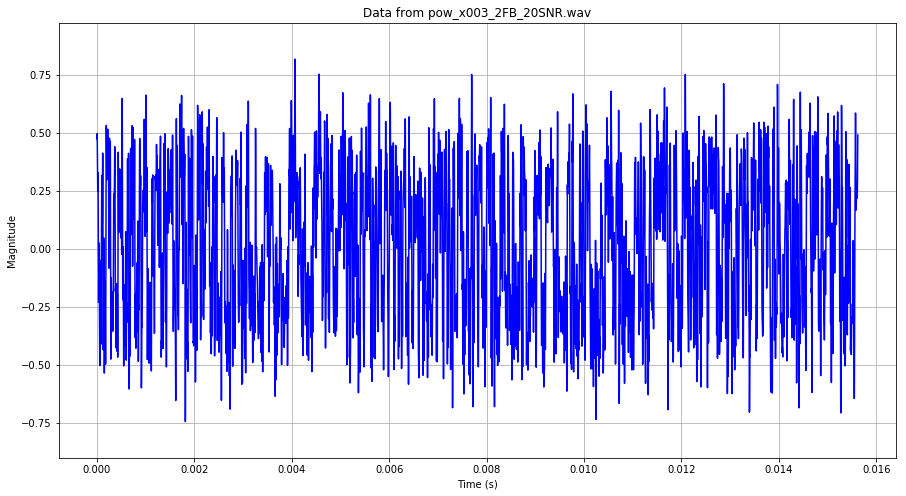

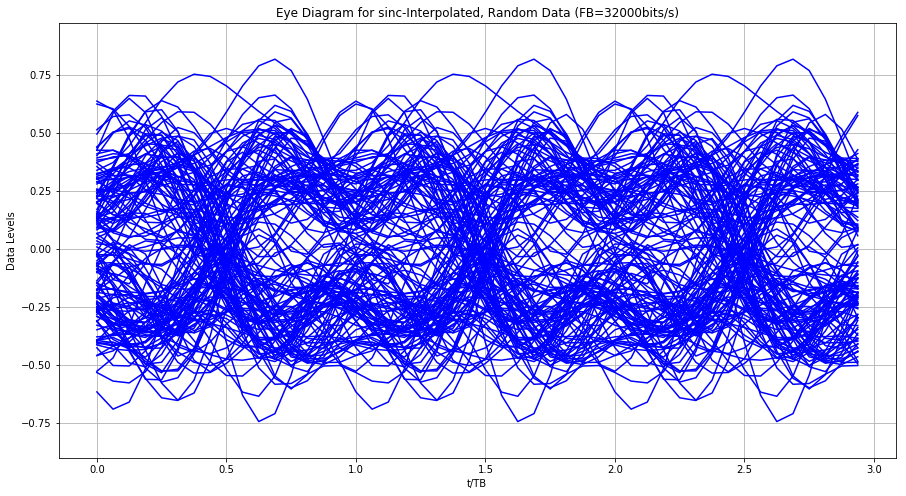

In [16]:
[seq, framerate] = wavfun.wavread("pow_x003_2FB_05SNR.wav")

seq=seq[2000:10000]
Fs=framerate

seqtt = quick.quicktt(seq,Fs)  # [0:10000]
quick.quickplot(seqtt,seq,'-b',[],[],'','Data from pow_x003_2FB_20SNR.wav','Time (s)','Magnitude',[],[15,8]) #['first',10000]

wave_an = ecen.sigWave(seq, Fs, 0, 'sinc-Interpolated, Random Data')
FB=32000

showfun.showeye(wave_an, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

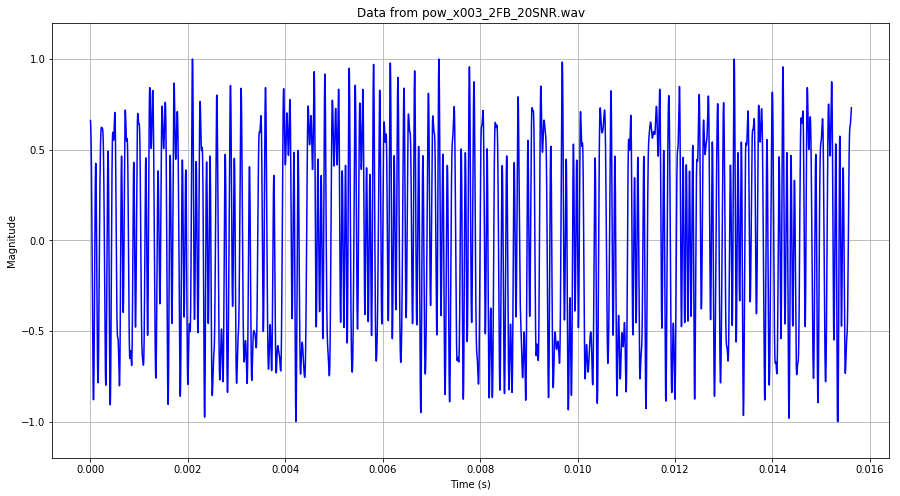

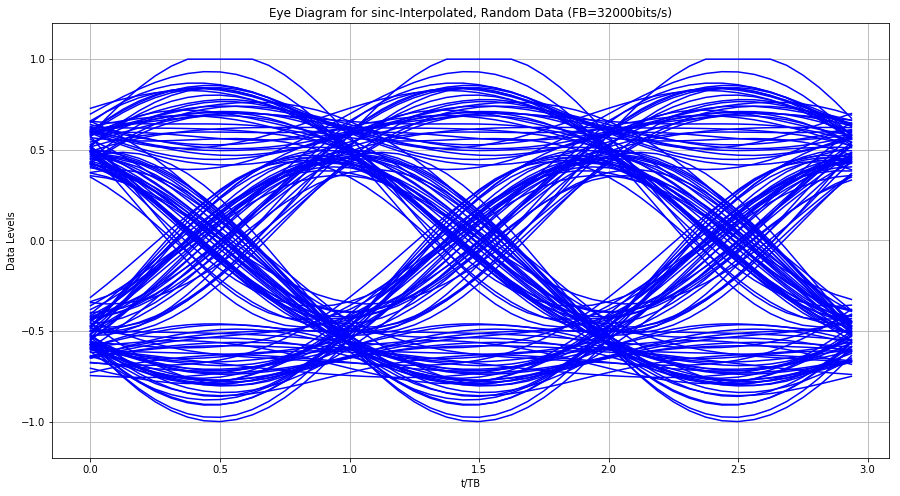

In [17]:
[seq, framerate] = wavfun.wavread("pow_x003_0_5FB_20SNR.wav")

seq=seq[2000:10000]
Fs=framerate

seqtt = quick.quicktt(seq,Fs)  # [0:10000]
quick.quickplot(seqtt,seq,'-b',[],[],'','Data from pow_x003_2FB_20SNR.wav','Time (s)','Magnitude',[],[15,8]) #['first',10000]

wave_an = ecen.sigWave(seq, Fs, 0, 'sinc-Interpolated, Random Data')
FB=32000

showfun.showeye(wave_an, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

Compare the different eye diagrams of bandwidth = 2*FB (SNR = 20, 10, 5, respectively) to that of the FB/2 (SNR = 20dB) signal

> The FB/2 bandlimited signal shows about as much closure in the eye diagrams as the 2FB bandwidth signal with an SNR of 10dB; Despite a large (good) SNR, the FB/2 is almost too bandlimited and is starting to close

##### Part D.) - Complex-Valued Noise in GNU Radio

What is the total average power of the noise? What are the average powers of the real and imaginary parts of the noise?

> ![2D.1](2_d_1.png)
> Total power: 1.02
> Imaginary avg power: 0.508
> 

How do the power readings change if A is changed from A=1 to A=2? What is the theoretical shape of the histogram?

> ![2D.2](2_d_2.png)
> The total average power quadruples (x4) and the imaginary component doubles (x2). The histogram should be follow a normal distribution (Gaussian)
> 

What happens to the displays and the power readings if you change from fL=16000 to fL=8000?

> ![2D.3](2_d_3.png)
> The display show that higher frequencies are attenuated and the power reduces to 0.5 - an eigth of what it was at 16000. This is the case for the imaginary component as well
> 


> ![2D.4](2_d_4.png)
> The power is very low this time...only 0.34, with an imaginary contrinbution of about 0.16
>
> ![2D.5](2_d_5.png)
> This time, the power rose! Up to 1.307 (about 4x increase), with a similar increase in the imaginary contribution. The histogram should be follow a uniform distribution (level across all frequencies)
>
> ![2D.6](2_d_6.png) 
> Again, the display show attenuation on both sides of the spectrum, and a power decrease as fL is lowered by 1/2, down to 0.67 (a reduction of about 1/2)